In [44]:
import numpy as np 
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

def fgaussian(x, A, B, C, D):
    return A * np.exp(-((x - B) ** 2) / (2 * C ** 2)) + D

def ftwogaussian(x, A1, A2, B1, B2, C1, C2, D):
    return (A1 * np.exp(-((x - B1) ** 2) / (2 * C1 ** 2)) 
            + A2 * np.exp(-((x - B2) ** 2) / (2 * C2 ** 2)) + D)

def is_float(string): 
    try:
        float(string)
        return True
    except ValueError:
        return False

# pull data 
#data1 = np.genfromtxt('MercuryData.csv', delimiter=',', skip_header=22, dtype=str)
data1 = np.genfromtxt('H2D2/DataFiles/MercuryData.csv', delimiter=',', dtype=str)
data1_copy = np.genfromtxt('H2D2/DataFiles/MercuryDataCopy.csv', delimiter=',', dtype=str)

data2 =  np.genfromtxt('H2D2/DataFiles/H2D2Data1.csv', delimiter=',', dtype=str)
data3 =  np.genfromtxt('H2D2/DataFiles/H2D2Data2.csv', delimiter=',', dtype=str)
data4 =  np.genfromtxt('H2D2/DataFiles/H2D2Data3.csv', delimiter=',', dtype=str)
data5 =  np.genfromtxt('H2D2/DataFiles/H2D2Data4.csv', delimiter=',', dtype=str)


# split columns from data into x and y values 
x_data_1 = [float(row[0]) if is_float(row[0]) else np.nan for row in data1]
y_data_1 = [float(row[1]) if is_float(row[1]) else np.nan for row in data1]
x_data_1_copy = [float(row[0]) if is_float(row[0]) else np.nan for row in data1_copy]
y_data_1_copy = [float(row[1]) if is_float(row[1]) else np.nan for row in data1_copy]

x_data_2 = [float(row[0]) if is_float(row[0]) else np.nan for row in data2]
y_data_2 = [float(row[1]) if is_float(row[1]) else np.nan for row in data2]
x_data_3 = [float(row[0]) if is_float(row[0]) else np.nan for row in data3]
y_data_3 = [float(row[1]) if is_float(row[1]) else np.nan for row in data3]
x_data_4 = [float(row[0]) if is_float(row[0]) else np.nan for row in data4]
y_data_4 = [float(row[1]) if is_float(row[1]) else np.nan for row in data4]
x_data_5 = [float(row[0]) if is_float(row[0]) else np.nan for row in data5]
y_data_5 = [float(row[1]) if is_float(row[1]) else np.nan for row in data5]

#### Mercury Calibration

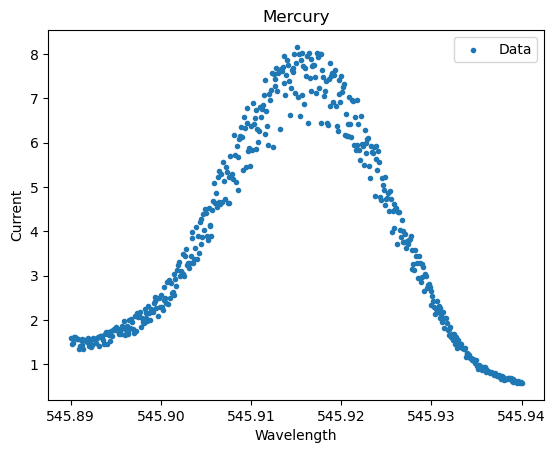

In [45]:
# plot all data 

plt.scatter(x_data_1, y_data_1, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('Mercury')
plt.legend()
plt.show()

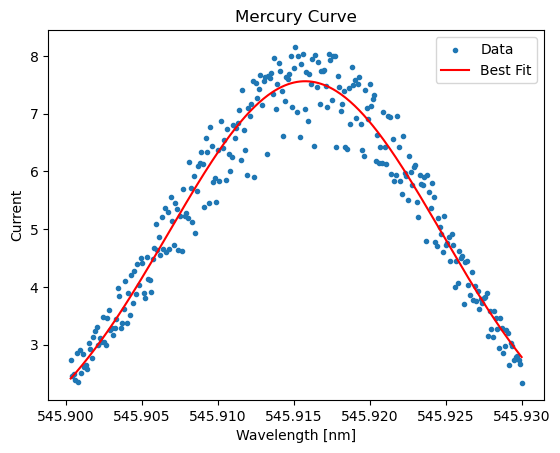

Peak 1 (0.081 MeV):

A1 = 6.68835828 ± 0.31518634
B1 = 545.91574142 ± 0.00006202
C1 = 0.00900771 ± 0.00038161
D = 0.87393753 ± 0.33408648


In [46]:
#x_min = 545.901
#x_max = 545.93
A1 = 7
B1 = 545.91
C1 = 0.01
D = 1

params, covariance = curve_fit(fgaussian, x_data_1_copy, y_data_1_copy, 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_1_copy, y_data_1_copy, label='Data', marker='.')
plt.plot(x_data_1_copy, fgaussian(x_data_1_copy, *params), label='Best Fit', color='red')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Current')
plt.title('Mercury Curve')
plt.legend()
plt.show()

print('Peak 1 (0.081 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### 656.279 nm

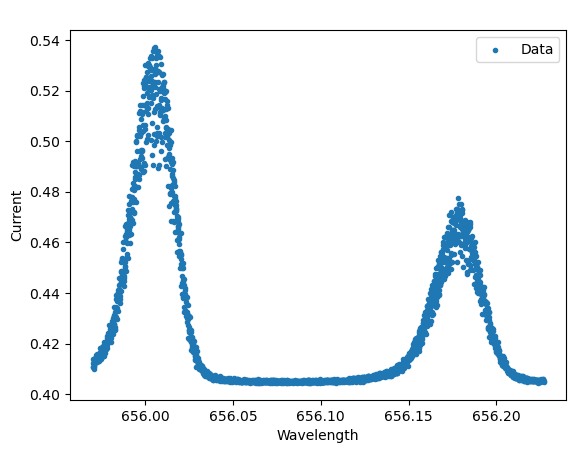

In [47]:
plt.scatter(x_data_2, y_data_2, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title(' ')
plt.legend()
plt.show()

### 486.135 nm

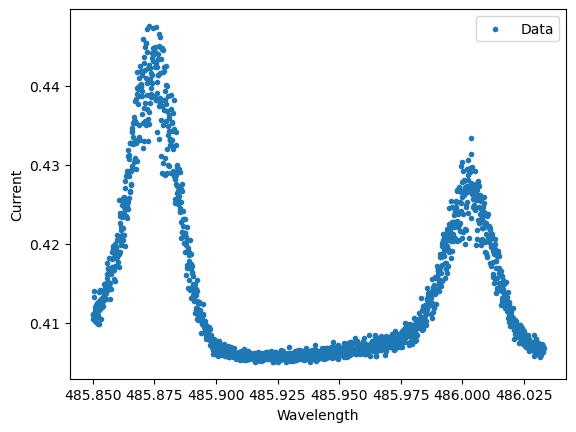

In [48]:
plt.scatter(x_data_3, y_data_3, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('')
plt.legend()
plt.show()

### 434.0472 nm

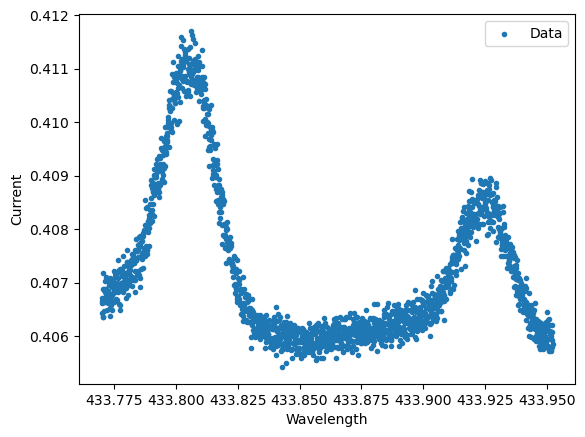

In [49]:
plt.scatter(x_data_4, y_data_4, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('')
plt.legend()
plt.show()

### 410.1734 nm

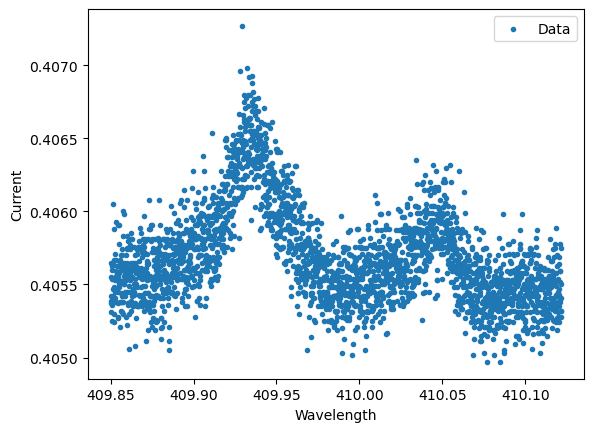

In [50]:
plt.scatter(x_data_5, y_data_5, label='Data', marker='.')
plt.xlabel('Wavelength')
plt.ylabel('Current')
plt.title('')
plt.legend()
plt.show()